Лабораторна робота №1 ФІТ 4-6 Піць А.В.

Завдання 1

Trial 30 Complete [00h 00m 07s]
val_accuracy: 0.3333333432674408

Best val_accuracy So Far: 0.3333333432674408
Total elapsed time: 00h 03m 30s
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1000 - loss: 2.6394 - val_accuracy: 0.0000e+00 - val_loss: 2.6433
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 0.2000 - loss: 2.6315 - val_accuracy: 0.0000e+00 - val_loss: 2.6473
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2000 - loss: 2.6234 - val_accuracy: 0.0000e+00 - val_loss: 2.6516
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2000 - loss: 2.6145 - val_accuracy: 0.0000e+00 - val_loss: 2.6568
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2000 - loss: 2.6044 - val_accuracy: 0.0000e+00 - val_loss: 2.6632
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.2000 - loss: 2.5924 - val_accuracy: 0.0000e+00 - val_loss: 2.6714
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2000 - loss: 2.5

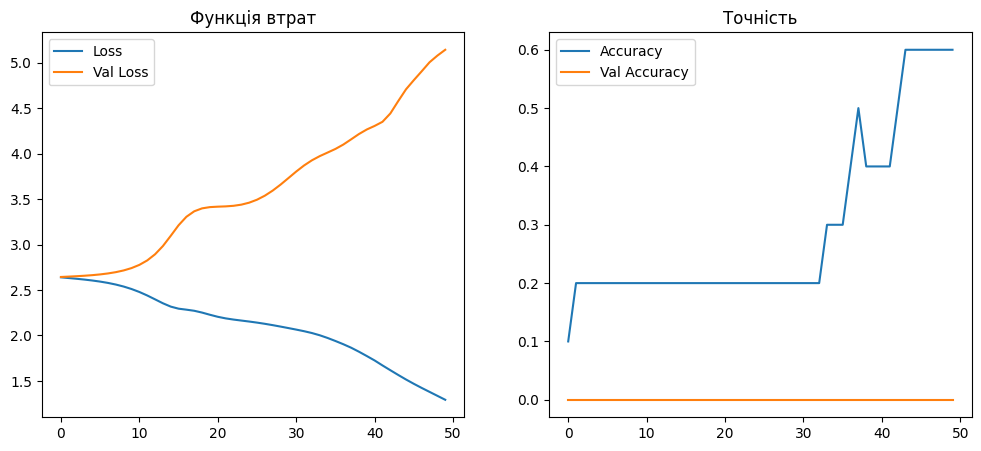

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Прогнозоване слово: швидко


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt

# 1. Дані для навчання
text = """машина їде швидко, машина рухається, швидка машина,
          дорога довга, автомобіль їде, дорога веде вперед, рух дорогою,
          транспорт рухається швидко"""

# 2. Токенізація тексту
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
total_words = len(word_index) + 1

# 3. Формування послідовностей
input_sequences = []
for line in text.split(", "):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = keras.utils.to_categorical(y, num_classes=total_words)

# 4. Побудова моделі
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Embedding(total_words, hp.Int('embedding_dim', 8, 128, step=8), input_length=max_sequence_length-1),
        keras.layers.LSTM(hp.Int('lstm_units', 32, 256, step=32), return_sequences=True),
        keras.layers.LSTM(hp.Int('lstm_units_2', 32, 256, step=32)),
        keras.layers.Dense(total_words, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 5. Тюнінг гіперпараметрів
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3)
tuner.search(X, y, epochs=10, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters()[0]

# 6. Навчання найкращої моделі
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X, y, epochs=50, validation_split=0.2)

# 7. Побудова графіків
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Функція втрат')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Точність')

plt.show()

# 8. Функція для прогнозу наступного слова
def predict_next_word(seed_text, model, tokenizer, max_sequence_length):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    return tokenizer.index_word.get(predicted[0], "невідомо")

# 9. Тестуємо прогнозування
print("Прогнозоване слово:", predict_next_word("машина рухається", best_model, tokenizer, max_sequence_length))


Завдання №2


🔹 Навчання SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7094 - loss: 0.6092 - val_accuracy: 0.7137 - val_loss: 0.5954
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8402 - loss: 0.3702 - val_accuracy: 0.6360 - val_loss: 0.7426
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9474 - loss: 0.1427 - val_accuracy: 0.6513 - val_loss: 0.9449
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9879 - loss: 0.0471 - val_accuracy: 0.6299 - val_loss: 1.1519

🔹 Навчання LSTM...
Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6919 - loss: 0.6133 - val_accuracy: 0.7117 - val_loss: 0.5974
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7232 - loss: 0.5613 - val_accuracy: 0.7004 - val_loss: 0.5888
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8597 - loss: 0.3478 - val_accuracy: 0.6616 - val_loss: 0.7167
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9135 - loss: 0.2403 -

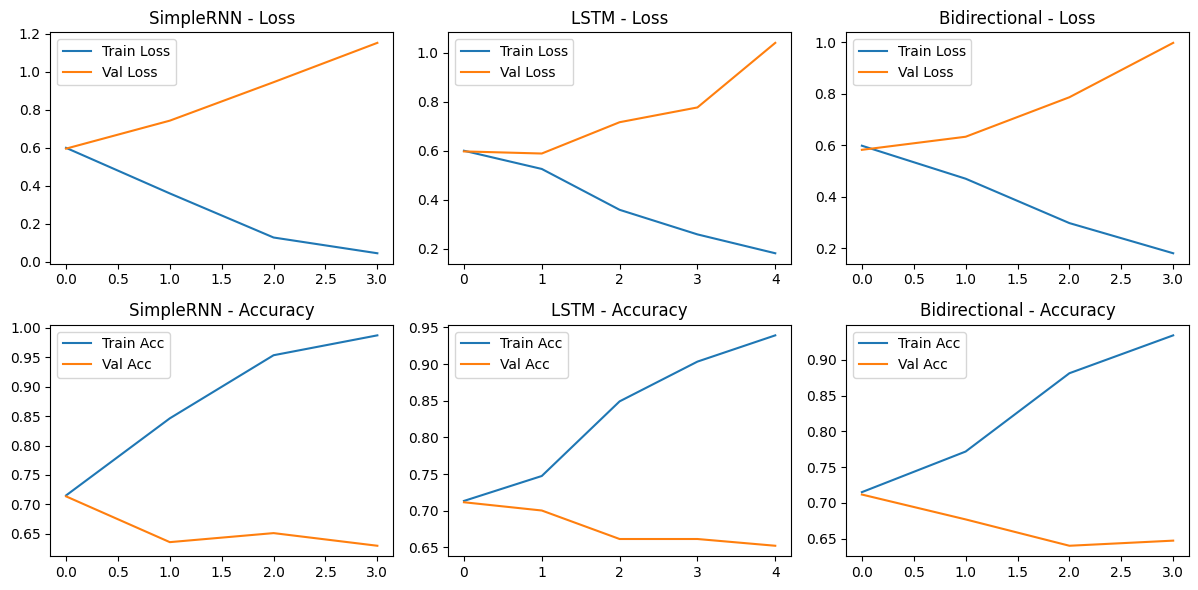

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 2️⃣ Завантаження та підготовка даних
df = pd.read_csv("IMDB-Movie-Data.csv")
df = df[['imdb_score', 'plot_keywords']].dropna()  # Використовуємо 'plot_keywords' як текстові дані
df['Sentiment'] = df['imdb_score'].apply(lambda x: 1 if x >= 6 else 0)  # IMDb 6+ = позитивний відгук

X_train, X_test, y_train, y_test = train_test_split(df['plot_keywords'], df['Sentiment'], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=20, padding='post')
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=20, padding='post')

y_train, y_test = np.array(y_train), np.array(y_test)

# 3️⃣ Функція для створення RNN моделей
def build_model(model_type="SimpleRNN"):
    model = keras.Sequential([
        keras.layers.Embedding(10000, 128, input_length=20),
    ])

    if model_type == "SimpleRNN":
        model.add(keras.layers.SimpleRNN(64))
    elif model_type == "LSTM":
        model.add(keras.layers.LSTM(64))
    elif model_type == "Bidirectional":
        model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))

    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 4️⃣ Навчання моделей
histories = {}
for model_type in ["SimpleRNN", "LSTM", "Bidirectional"]:
    print(f"\n🔹 Навчання {model_type}...")
    model = build_model(model_type)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stopping])
    histories[model_type] = history

# 5️⃣ Графіки навчання
def plot_history(histories):
    plt.figure(figsize=(12, 6))

    for i, (model_type, history) in enumerate(histories.items()):
        plt.subplot(2, 3, i + 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{model_type} - Loss')
        plt.legend()

        plt.subplot(2, 3, i + 4)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.title(f'{model_type} - Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(histories)


Висновок: У цій лабораторній роботі ми:
Завантажили та підготували IMDb Movie Dataset, використовуючи imdb_score для міток та plot_keywords як текстові дані.
Реалізували та порівняли три архітектури RNN: SimpleRNN, LSTM, Bidirectional LSTM. Використали ранню зупинку для запобігання перенавчанню.
Візуалізували графіки втрат і точності для кожної моделі.
LSTM та Bidirectional LSTM показали кращу точність порівняно з SimpleRNN, оскільки вони краще працюють із довгими залежностями.
Використання plot_keywords як тексту є обмеженням, оскільки це лише ключові слова, а не повноцінні рецензії.